In [1]:
import operator
import re
import pandas as pd

In [2]:
data = pd.read_excel('NUGUCrawling.xlsx',skiprows=1)
# data.head()
lst = []
for el in data['text']:
    word = str(el).split(" ")
    for items in word:
        words = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]','',items)
        lst.append(words)
lst[:50]

['아리아',
 '00노래',
 '한시간만두곡만',
 '들려줘',
 '네',
 '00노래',
 '한시간만두곡만',
 '들려드릴께요',
 '내일',
 '아침',
 '9시',
 '부탁해',
 '선착순',
 '쿠폰',
 '받는',
 '날이야',
 '',
 '옵컬오브콜스',
 '나한테',
 '무슨',
 '옷이',
 '어울릴까',
 '님이',
 '키가',
 '크시면',
 '이것',
 '키가',
 '작으시면',
 '이것',
 '뚱뚱하면',
 '이것',
 '홀쭉하면',
 '이것입니다안녕하세요',
 '누구나',
 '주식회사',
 '가상',
 'CEO',
 '이두희입니다',
 '패션리더들은',
 '자기의',
 '몸에',
 '맞는',
 '핏을',
 '잘',
 '알고',
 '있죠',
 '그래서',
 '키가',
 '작던',
 '크던']

In [4]:
lst_b = data['text']
lst_b.head()

0      아리아 00노래 한시간만(두곡만) 들려줘? 네 00노래 한시간만(두곡만) 들려드릴께요
1            내일 아침 9시 부탁해~ 선착순 쿠폰 받는 날이야~ / 옵컬!(오브콜스!)
2    나한테 무슨 옷이 어울릴까 님이 키가 크시면 이것 키가 작으시면 이것 뚱뚱하면 이것...
3    아리야. 오늘 서울 날씨는 어떻게 되?\r\n주인님. 오늘 서울 날씨는 맑습니다. ...
4    GS : 아리아 고마워. 진짜 똑똑하네요.\r\n아리아 : 맞아요. 저 똑똑해요.\...
Name: text, dtype: object

In [5]:
mystr = ''    
word_corpus = mystr+' '.join(lst)
word_corpus

'아리아 00노래 한시간만두곡만 들려줘 네 00노래 한시간만두곡만 들려드릴께요 내일 아침 9시 부탁해 선착순 쿠폰 받는 날이야  옵컬오브콜스 나한테 무슨 옷이 어울릴까 님이 키가 크시면 이것 키가 작으시면 이것 뚱뚱하면 이것 홀쭉하면 이것입니다안녕하세요 누구나 주식회사 가상 CEO 이두희입니다 패션리더들은 자기의 몸에 맞는 핏을 잘 알고 있죠 그래서 키가 작던 크던 상관없이 옷을 잘입는 사람들은 굉장히 멋있는 경우가 많은데요 글쓴이 분은 그 점에 대해 잘 알고 계신거 같아요 아마 실제로 뵌다면 상당히 멋지실 거 같은 느낌이 드네요 아이디어를 제시해주셔서 감사합니다 개발 관련하여 논의하고 적용시킬 수 있도록 노력하겠습니다 아리야 오늘 서울 날씨는 어떻게 되rn주인님 오늘 서울 날씨는 맑습니다 서울 최저온도 21도 최고온도 26도입니다안녕하세요 누구나 주식회사 가상 CEO 이두희입니다 그날의 날씨에 따라 하루의 분위기가 결정되는 경우가 많죠 햇빛이 쨍쨍한 날엔 뭔가 액티브한 분위기가 흐르고 구름이 끼거나 비가 오는 날에는 조용하고 정적인 분위기가 흐르구요 이제 가을인만큼 햇빛은 따스한데 바람은 쌀쌀한 날씨인 거 같아요 GS  아리아 고마워 진짜 똑똑하네요rn아리아  맞아요 저 똑똑해요rnrnGS  아리아 오늘 도착한 문자 내용 알려줘rn아리아  똑똑한 아리아가 오늘 도착한 문자 내용을 알려드릴게요rn휴대폰 블루투스를 통하여 문자내용 전달rn 아리아 오늘의 명언rn아리아 우울해rnㅡ오늘의 명언 읽어줌 아리아 친구가 결혼을 하는데 축하말 추천 부탁해rn  살다가  아니면 요즘은 반품도 많이 하니까 화이팅 아리아 그 요리 어떻게 해야 맛있게 할수 있지 예 그 요리는 이렇게 저렇게 요렇게 하면 맛있게 됩니다안녕하세요 누구나 주식회사 가상 CEO 이두희입니다 인터넷의 블로그나 사이트에서 레시피를 본 후에 만들어도 뭔가 부족한 맛이 나는 경우가 있죠 그래서 맛을 좋게하려고 이것저것 넣어봐도 잘 안되는 경우가 많구요 이 때 NUGU가 왜 맛이 잘 안나는지에 대해 콕 집어 말해

In [6]:
# 텍스트에서 형태소 추출 -> pip install konlpy, jpype1, Jpype1-py3
from konlpy.tag import Twitter
from collections import Counter

nouns_tagger = Twitter()
nouns = nouns_tagger.nouns(word_corpus)
count = Counter(nouns)

sorted_count = sorted(count.items(), key=operator.itemgetter(1),reverse=True)
sorted_count

[('아리아', 3340),
 ('오늘', 1559),
 ('아리야', 972),
 ('나', 689),
 ('네', 651),
 ('좀', 621),
 ('누구', 606),
 ('노래', 534),
 ('시', 519),
 ('기능', 437),
 ('때', 428),
 ('수', 423),
 ('뭐', 423),
 ('음악', 422),
 ('시간', 385),
 ('분', 382),
 ('지금', 374),
 ('날씨', 372),
 ('것', 361),
 ('일', 352),
 ('요', 334),
 ('내일', 318),
 ('내', 294),
 ('등', 261),
 ('집', 237),
 ('제', 229),
 ('저', 221),
 ('사람', 220),
 ('검색', 209),
 ('주식회사', 208),
 ('거', 207),
 ('이두희', 205),
 ('현재', 205),
 ('알람', 205),
 ('너무', 203),
 ('가상', 202),
 ('날', 188),
 ('추천', 185),
 ('더', 184),
 ('영화', 182),
 ('아침', 181),
 ('연동', 179),
 ('월', 178),
 ('이', 174),
 ('정보', 174),
 ('뉴스', 173),
 ('일정', 172),
 ('기분', 164),
 ('설정', 163),
 ('전화', 157),
 ('말', 151),
 ('이름', 150),
 ('예', 149),
 ('주인', 147),
 ('하루', 147),
 ('요즘', 146),
 ('그', 145),
 ('후', 144),
 ('재생', 141),
 ('팅커벨', 140),
 ('사용자', 138),
 ('가장', 134),
 ('친구', 131),
 ('아리', 131),
 ('소리', 130),
 ('음성', 128),
 ('비', 127),
 ('답변', 127),
 ('이번', 125),
 ('번', 125),
 ('드릴', 123),
 ('우리', 120),
 ('대화', 11

In [12]:
word_count = list(sorted_count)

In [17]:
import csv

with open('words_results.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Word','Count'])
    for row in word_count:
        csv_out.writerow(row)

In [36]:
import networkx as net
import matplotlib.pyplot as plot
%matplotlib inline

EdgesAsDF = pd.read_excel('result_SNAMatrix.xlsx',sheet_name='매트릭스2', index_col=0)

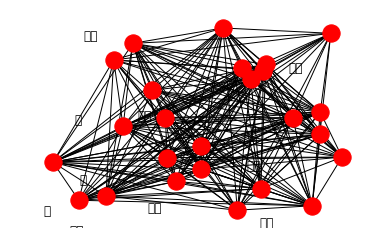

In [76]:
df = EdgesAsDF.set_index('Unnamed: 1')
adjacency=df.iloc[0:25, 0:25]
adjacency
labels=list(adjacency)

NWfromMatrix = net.Graph(adjacency.values)
NWfromMatrix = net.relabel_nodes(NWfromMatrix, dict(zip(range(106), labels)))
labels=net.draw_networkx_labels(NWfromMatrix,pos=net.spring_layout(NWfromMatrix))
net.draw_random(NWfromMatrix)

In [77]:
bc = net.betweenness_centrality(NWfromMatrix)
sorted_bc = sorted(bc.items(), key=operator.itemgetter(1),reverse=True)
list(sorted_bc)

[('검색', 0.013867726831281818),
 ('나', 0.013867726831281818),
 ('노래', 0.013867726831281818),
 ('누구', 0.013867726831281818),
 ('내일', 0.01198797117914765),
 ('너', 0.011182630124445984),
 ('길', 0.010696600985923234),
 ('기능', 0.010664549171582419),
 ('날씨', 0.008951206153891576),
 ('맛', 0.008836082277578441),
 ('대화', 0.008592220332949232),
 ('기분', 0.00761395999567355),
 ('다음', 0.00667117439016416),
 ('뉴스', 0.006373661504735674),
 ('곡', 0.006150604983725189),
 ('라디오', 0.00421594248320591),
 ('교통', 0.003633175340336466),
 ('가족', 0.003614415387113596),
 ('근처', 0.0034423802966002453),
 ('도착', 0.003427049470847424),
 ('마음', 0.0033575386676409696),
 ('리스트', 0.0028640018809456143),
 ('경기', 0.0016884011129535428),
 ('남자', 0.0014984979499045995),
 ('라면', 0.00022644927536231884)]